In [10]:
import os

import numpy as np
import pandas as pd
import json 
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'

In [11]:
with open('{}/response1.json'.format(os.getcwd())) as f:
    d = json.load(f)


In [12]:
horses = json_normalize(d['data'])


In [13]:
horses.head(3)

_id                   created  \
0  5c122da19f23827aafbac607  2018-12-12T16:17:34.590Z   
1  5c122da19f23827aafbac608  2018-12-12T16:17:34.590Z   
2  5c122da19f23827aafbac609  2018-12-12T16:17:34.590Z   

                                              horses        name  \
0  [{'prices': [{'lay': 80, 'back': 16, 'created'...  10:10 Vaal   
1  [{'prices': [{'lay': 0, 'back': 0, 'created': ...  11:20 Vaal   
2  [{'prices': [{'lay': 0, 'back': 0, 'created': ...  10:40 Vaal   

           start  
0  1544695800000  
1  1544700000000  
2  1544697600000

In [14]:
work_data = json_normalize(data=d['data'], record_path='horses')
work_data.head()

_id                name  number  \
0  5c122da09f23827aafbac3d5  One Dollar Massage       1   
1  5c122da09f23827aafbac421       Charming Rose       2   
2  5c122da09f23827aafbac465            Viserion       4   
3  5c122da09f23827aafbac3e1      Flying Fantasy       5   
4  5c122da09f23827aafbac3f9          Jammin Cat       6   

                                              prices  
0  [{'lay': 80, 'back': 16, 'created': '2018-12-1...  
1  [{'lay': 0, 'back': 44, 'created': '2018-12-13...  
2  [{'lay': 0, 'back': 60, 'created': '2018-12-13...  
3  [{'lay': 100, 'back': 55, 'created': '2018-12-...  
4  [{'lay': 0, 'back': 65, 'created': '2018-12-13...

In [15]:
prices_data = json_normalize(data=d['data'], record_path=['horses', 'prices'])
prices_data.head()

_id  amountBack  amountLay  back  \
0  5c122da09f23827aafbac1a3    17.82026   31.18546  16.0   
1  5c122dea9f23827aafbad06c    22.30702   35.51023  16.0   
2  5c122f839f23827aafbae129    14.00121   35.51023  16.5   
3  5c122f899f23827aafbae154    12.77073   10.25827  17.0   
4  5c122f8a9f23827aafbae161    20.29156   35.51023  16.0   

                    created   lay  
0  2018-12-13T10:00:00.314Z  80.0  
1  2018-12-13T10:01:14.436Z  80.0  
2  2018-12-13T10:08:03.570Z  80.0  
3  2018-12-13T10:08:09.148Z  48.0  
4  2018-12-13T10:08:10.485Z  80.0

In [16]:
horses.head(3)

_id                   created  \
0  5c122da19f23827aafbac607  2018-12-12T16:17:34.590Z   
1  5c122da19f23827aafbac608  2018-12-12T16:17:34.590Z   
2  5c122da19f23827aafbac609  2018-12-12T16:17:34.590Z   

                                              horses        name  \
0  [{'prices': [{'lay': 80, 'back': 16, 'created'...  10:10 Vaal   
1  [{'prices': [{'lay': 0, 'back': 0, 'created': ...  11:20 Vaal   
2  [{'prices': [{'lay': 0, 'back': 0, 'created': ...  10:40 Vaal   

           start  
0  1544695800000  
1  1544700000000  
2  1544697600000

In [17]:
print(len(horses.horses))

45


In [169]:
names = []
lay_values = []
back_values = []
numbers = []
stadium_info = []
time = []
start = []
created = []

for i in range(len(work_data.prices)):
    for j in work_data['prices'][i]:
        for key, value in j.items():
            if str(key) == 'lay':
                numbers.append(work_data.number[i])
                names.append(work_data.name[i])
                lay_values.append(j[key])
#                 alist.append([work_data.name[i], {'lay':j[key]}])
            elif str(key) == 'back':
                back_values.append(j[key])
#                 alist.append([work_data.name[i], {'back':j[key]}])

for i in range(len(horses.horses)):
    for obj in horses.horses[i]:
        for k,v in obj.items():
            if str(k) == 'name':
                for n in names:
                    if str(obj[k]) == str(n):
                        stadium_info.append(horses.name[i])
                        start.append(horses.start[i])
                        created.append(horses.created[i])


# d = {'names': names, 'lay_values': lay_values, 'back_values': back_values, 'number': numbers}
d = {'name': names, 'lay_values': lay_values, 'back_values': back_values, 'number': numbers, 
     'stadium_info': stadium_info, 'start': start, 'created':created}
df_horses = pd.DataFrame(data=d)

In [172]:
df_horses['year_created'] = df_horses['created'].apply(lambda x: x[:-20])
df_horses['day_created'] = df_horses['created'].apply(lambda x: x[-16:-14])
df_horses['month_created'] = df_horses['created'].apply(lambda x: x[-19:-17])
df_horses['time_created'] = df_horses['created'].apply(lambda x: x[-13:-5])
df_horses['time_z'] = df_horses['created'].apply(lambda x: x[-4:])
df_horses['stadium_name'] = df_horses['stadium_info'].apply(lambda x: x[5:])
df_horses['stadium_time'] = df_horses['stadium_info'].apply(lambda x: x[:5])

In [173]:
df_horses['start'] = df_horses['start'].astype(str)
df_horses = df_horses[(df_horses['lay_values'] < 200) & (df_horses['back_values'] < 200)]

In [174]:
df_horses = df_horses.drop('created', axis=1)
df_horses = df_horses.drop('stadium_info', axis=1)

# Max values

In [175]:
df_max = df_horses.sort_values('lay_values', ascending=False).drop_duplicates('back_values').sort_index().reset_index(drop=True)

In [176]:
len(df_max['back_values'].unique())

249

In [179]:
df_max

back_values  lay_values              name  number          start  \
0        3.30000     5.00000      Out Of Sight       9  1544695800000   
1        3.95000     5.20000     Rustling Leaf      10  1544695800000   
2        3.40000    13.00000          Nephrite       2  1544700000000   
3        3.75000    14.00000          Missouri       3  1544700000000   
4        5.60000    29.00000       What A Poet       4  1544700000000   
5        2.80000    29.00000      Roman Flight       7  1544700000000   
6        2.24000    26.00000      Devil's Peak       9  1544700000000   
7        1.87719    15.00000     Savannah King      10  1544700000000   
8        2.40000    15.00000     Savannah King      10  1544700000000   
9        4.00000    20.00000          Generoso       2  1544697600000   
10       3.65000    19.00000          Cape Ash       4  1544697600000   
11       3.60000    19.00000          Cape Ash       4  1544697600000   
12       1.20408     2.08000           Blossom       7  1544697600000   
13       1.20833     2.08000           Blossom       7  1544697600000   
14       1.18518     2.50000           Blossom       7  1544697600000   
15       1.50505     2.50000           Blossom       7  1544697600000   
16       1.36363     2.50000           Blossom       7  1544697600000   
17       1.51546     2.50000           Blossom       7  1544697600000   
18       1.50000     1.62500           Blossom       7  1544697600000   
19       1.46511     1.53192           Blossom       7  1544697600000   
20       1.59523     1.60976           Blossom       7  1544697600000   
21       1.53763     1.60976           Blossom       7  1544697600000   
22       1.54945     1.60976           Blossom       7  1544697600000   
23       1.57471     1.60976           Blossom       7  1544697600000   
24       1.56818     1.60976           Blossom       7  1544697600000   
25       1.52631     1.59524           Blossom       7  1544697600000   
26       1.54347     1.56180           Blossom       7  1544697600000   
27       1.55555     1.60976           Blossom       7  1544697600000   
28       3.15000    10.00000        Mr Cuddles       1  1544702100000   
29       2.56000     2.96000       Seventh Son       9  1544704200000   
..           ...         ...               ...     ...            ...   
219      1.38461     1.46512        Final List       2  1544715600000   
220      1.40000     1.46512        Final List       2  1544715600000   
221      1.35714     1.39216        Final List       2  1544715600000   
222      1.32258     1.34483        Final List       2  1544715600000   
223      1.33898     1.35088        Final List       2  1544715600000   
224     19.50000   160.00000       Dublin Four       1  1544715600000   
225     20.00000   160.00000       Dublin Four       1  1544715600000   
226      2.38000     2.76000      Bon Calvados       4  1544714700000   
227     36.00000   180.00000       Real Armani       9  1544714700000   
228      0.00000   180.00000       Real Armani       9  1544714700000   
229     50.00000   180.00000       Real Armani       9  1544714700000   
230      4.40000    42.00000  Trooper Turnbull      11  1544714700000   
231      4.50000    42.00000  Trooper Turnbull      11  1544714700000   
232    170.00000     0.00000   Dorothy's Flame      13  1544714700000   
233    190.00000     0.00000   Dorothy's Flame      13  1544714700000   
234      4.20000   110.00000          Tasaaboq       8  1544724900000   
235      4.30000   110.00000          Tasaaboq       8  1544724900000   
236      4.60000   110.00000          Tasaaboq       8  1544724900000   
237      2.88000     3.15000           Luxford       7  1544732100000   
238      2.34000     4.20000           Luxford       7  1544732100000   
239      2.42000     2.66000           Luxford       7  1544732100000   
240      2.44000     2.68000           Luxford       7  1544732100000   
241      2.68000     3.05000           Luxford       7  1544732

In [14]:
# train = df_horses[:-18000]
# test = df_horses[-18000:]

In [150]:
hist_features = ['back_values', 'lay_values']

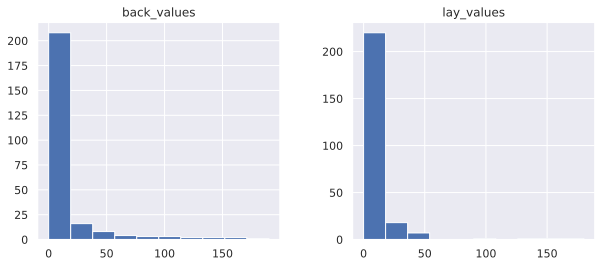

In [151]:
df_max[hist_features].hist(figsize=(10,4));

In [45]:
df_encoded = pd.get_dummies(df_horses)

In [21]:
from sklearn.utils import shuffle
shuffled = shuffle(df_encoded, random_state=42)

In [94]:
train = shuffled[:-18000]
test = shuffled[-18000::]

In [46]:
train = df_encoded[:36000]

In [25]:
train.shape

(36000, 12)

In [47]:
test = df_encoded[36000:50000]

In [28]:
test.shape

(14000, 12)

In [48]:
y = train['lay_values']
X = train.drop('lay_values', axis=1)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()#16

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [12, 24, 48]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [54]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [55]:
random_cv = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                              n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [56]:
random_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_leaf=2, max_depth=30, min_samples_split=24, max_features=sqrt, bootstrap=True 
[CV] n_estimators=400, min_samples_leaf=2, max_depth=30, min_samples_split=24, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=400, min_samples_leaf=2, max_depth=30, min_samples_split=24, max_features=sqrt, bootstrap=True, total=  30.4s
[CV] n_estimators=400, min_samples_leaf=2, max_depth=30, min_samples_split=24, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=400, min_samples_leaf=2, max_depth=30, min_samples_split=24, max_features=sqrt, bootstrap=True, total=  30.6s
[CV] n_estimators=2000, min_samples_leaf=2, max_depth=10, min_samples_split=24, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=400, min_samples_leaf=2, max_depth=30, min_samples_split=24, max_features=sqrt, bootstrap=True, total=  31.6s
[CV] n_estimators=2000, min_samples_leaf=2, max_depth=10, min_samples_split=24, max_features=

[CV] n_estimators=800, min_samples_leaf=2, max_depth=90, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=800, min_samples_leaf=2, max_depth=90, min_samples_split=24, max_features=sqrt, bootstrap=False, total= 1.9min
[CV] n_estimators=800, min_samples_leaf=2, max_depth=90, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=800, min_samples_leaf=2, max_depth=90, min_samples_split=24, max_features=sqrt, bootstrap=False, total= 1.9min
[CV] n_estimators=2000, min_samples_leaf=2, max_depth=10, min_samples_split=48, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=800, min_samples_leaf=2, max_depth=90, min_samples_split=24, max_features=sqrt, bootstrap=False, total= 1.8min
[CV] n_estimators=2000, min_samples_leaf=2, max_depth=10, min_samples_split=48, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=2000, min_samples_leaf=2, max_depth=10, min_samples_split=48, max_features=sqrt, bootstrap=False, total= 1.3min
[CV] n_estimators

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 58.5min


[CV]  n_estimators=2000, min_samples_leaf=2, max_depth=10, min_samples_split=48, max_features=sqrt, bootstrap=False, total= 1.4min
[CV] n_estimators=1600, min_samples_leaf=4, max_depth=10, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=2000, min_samples_leaf=2, max_depth=10, min_samples_split=48, max_features=sqrt, bootstrap=False, total= 1.3min
[CV] n_estimators=1600, min_samples_leaf=4, max_depth=10, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=1600, min_samples_leaf=4, max_depth=10, min_samples_split=24, max_features=sqrt, bootstrap=False, total= 1.1min
[CV] n_estimators=1600, min_samples_leaf=4, max_depth=10, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=1600, min_samples_leaf=4, max_depth=10, min_samples_split=24, max_features=sqrt, bootstrap=False, total= 1.1min
[CV] n_estimators=800, min_samples_leaf=4, max_depth=30, min_samples_split=48, max_features=sqrt, bootstrap=False 
[CV]  n_estim

[CV] n_estimators=1400, min_samples_leaf=2, max_depth=80, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=1400, min_samples_leaf=2, max_depth=80, min_samples_split=24, max_features=sqrt, bootstrap=False, total= 2.5min
[CV] n_estimators=1400, min_samples_leaf=2, max_depth=80, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=1400, min_samples_leaf=2, max_depth=80, min_samples_split=24, max_features=sqrt, bootstrap=False, total= 2.5min
[CV] n_estimators=1400, min_samples_leaf=2, max_depth=80, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=1800, min_samples_leaf=4, max_depth=None, min_samples_split=12, max_features=auto, bootstrap=True, total= 6.8min
[CV] n_estimators=400, min_samples_leaf=2, max_depth=None, min_samples_split=12, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=400, min_samples_leaf=2, max_depth=None, min_samples_split=12, max_features=sqrt, bootstrap=False, total=  49.0s
[CV] n_es

[CV]  n_estimators=800, min_samples_leaf=4, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=False, total=  51.5s
[CV] n_estimators=800, min_samples_leaf=4, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=1800, min_samples_leaf=8, max_depth=90, min_samples_split=12, max_features=sqrt, bootstrap=True, total= 1.7min
[CV] n_estimators=800, min_samples_leaf=4, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=800, min_samples_leaf=4, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=False, total=  50.5s
[CV] n_estimators=1200, min_samples_leaf=4, max_depth=20, min_samples_split=24, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=800, min_samples_leaf=4, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=False, total=  50.7s
[CV] n_estimators=1200, min_samples_leaf=4, max_depth=20, min_samples_split=24, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=1

[CV] n_estimators=2000, min_samples_leaf=4, max_depth=90, min_samples_split=12, max_features=auto, bootstrap=True 
[CV]  n_estimators=2000, min_samples_leaf=4, max_depth=90, min_samples_split=12, max_features=auto, bootstrap=True, total= 7.3min
[CV] n_estimators=2000, min_samples_leaf=4, max_depth=90, min_samples_split=12, max_features=auto, bootstrap=True 
[CV]  n_estimators=2000, min_samples_leaf=4, max_depth=90, min_samples_split=12, max_features=auto, bootstrap=True, total= 7.3min
[CV] n_estimators=400, min_samples_leaf=8, max_depth=80, min_samples_split=48, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=400, min_samples_leaf=8, max_depth=80, min_samples_split=48, max_features=sqrt, bootstrap=False, total=  31.6s
[CV] n_estimators=400, min_samples_leaf=8, max_depth=80, min_samples_split=48, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=400, min_samples_leaf=8, max_depth=80, min_samples_split=48, max_features=sqrt, bootstrap=False, total=  29.9s
[CV] n_estimators=40

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 237.8min


[CV]  n_estimators=1000, min_samples_leaf=8, max_depth=50, min_samples_split=48, max_features=auto, bootstrap=False, total= 4.5min
[CV] n_estimators=1000, min_samples_leaf=8, max_depth=30, min_samples_split=24, max_features=auto, bootstrap=False 
[CV]  n_estimators=1000, min_samples_leaf=8, max_depth=30, min_samples_split=24, max_features=auto, bootstrap=False, total= 4.8min
[CV] n_estimators=1000, min_samples_leaf=8, max_depth=30, min_samples_split=24, max_features=auto, bootstrap=False 
[CV]  n_estimators=1000, min_samples_leaf=8, max_depth=30, min_samples_split=24, max_features=auto, bootstrap=False, total= 4.7min
[CV] n_estimators=1400, min_samples_leaf=4, max_depth=None, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=1000, min_samples_leaf=8, max_depth=30, min_samples_split=24, max_features=auto, bootstrap=False, total= 4.8min
[CV] n_estimators=1400, min_samples_leaf=4, max_depth=None, min_samples_split=24, max_features=sqrt, bootstrap=False 
[CV]  n_

[CV] n_estimators=1600, min_samples_leaf=2, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=1600, min_samples_leaf=2, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=True, total= 1.2min
[CV] n_estimators=1600, min_samples_leaf=2, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=1600, min_samples_leaf=2, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=True, total= 1.2min
[CV] n_estimators=1600, min_samples_leaf=4, max_depth=None, min_samples_split=48, max_features=auto, bootstrap=True 
[CV]  n_estimators=1600, min_samples_leaf=2, max_depth=20, min_samples_split=48, max_features=sqrt, bootstrap=True, total= 1.3min
[CV] n_estimators=1600, min_samples_leaf=4, max_depth=None, min_samples_split=48, max_features=auto, bootstrap=True 
[CV]  n_estimators=1600, min_samples_leaf=4, max_depth=None, min_samples_split=48, max_features=auto, bootstrap=True, total= 5.5min
[CV] n_estimat

[CV]  n_estimators=400, min_samples_leaf=4, max_depth=90, min_samples_split=48, max_features=sqrt, bootstrap=False, total=  34.6s
[CV] n_estimators=400, min_samples_leaf=4, max_depth=90, min_samples_split=48, max_features=sqrt, bootstrap=False 
[CV]  n_estimators=400, min_samples_leaf=4, max_depth=90, min_samples_split=48, max_features=sqrt, bootstrap=False, total=  34.5s
[CV] n_estimators=1600, min_samples_leaf=2, max_depth=None, min_samples_split=48, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=1600, min_samples_leaf=2, max_depth=None, min_samples_split=48, max_features=sqrt, bootstrap=True, total= 1.7min
[CV] n_estimators=1600, min_samples_leaf=2, max_depth=None, min_samples_split=48, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=1600, min_samples_leaf=2, max_depth=None, min_samples_split=48, max_features=sqrt, bootstrap=True, total= 1.7min
[CV] n_estimators=1600, min_samples_leaf=2, max_depth=None, min_samples_split=48, max_features=sqrt, bootstrap=True 
[CV]  n_es

[CV] n_estimators=400, min_samples_leaf=2, max_depth=100, min_samples_split=24, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=400, min_samples_leaf=2, max_depth=100, min_samples_split=24, max_features=sqrt, bootstrap=True, total=  30.4s
[CV] n_estimators=1600, min_samples_leaf=8, max_depth=80, min_samples_split=12, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=400, min_samples_leaf=2, max_depth=100, min_samples_split=24, max_features=sqrt, bootstrap=True, total=  30.5s
[CV] n_estimators=1600, min_samples_leaf=8, max_depth=80, min_samples_split=12, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=1600, min_samples_leaf=8, max_depth=80, min_samples_split=12, max_features=sqrt, bootstrap=True, total= 1.6min
[CV] n_estimators=1600, min_samples_leaf=8, max_depth=80, min_samples_split=12, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=1600, min_samples_leaf=8, max_depth=80, min_samples_split=12, max_features=sqrt, bootstrap=True, total= 1.6min
[CV] n_estimators=80

[CV]  n_estimators=1000, min_samples_leaf=2, max_depth=10, min_samples_split=12, max_features=auto, bootstrap=False, total= 3.5min
[CV] n_estimators=2000, min_samples_leaf=4, max_depth=20, min_samples_split=12, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=200, min_samples_leaf=8, max_depth=100, min_samples_split=24, max_features=auto, bootstrap=False, total=  56.8s
[CV] n_estimators=2000, min_samples_leaf=4, max_depth=20, min_samples_split=12, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=2000, min_samples_leaf=4, max_depth=20, min_samples_split=12, max_features=sqrt, bootstrap=True, total= 1.7min
[CV] n_estimators=2000, min_samples_leaf=4, max_depth=20, min_samples_split=12, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=2000, min_samples_leaf=4, max_depth=20, min_samples_split=12, max_features=sqrt, bootstrap=True, total= 1.7min
[CV] n_estimators=2000, min_samples_leaf=4, max_depth=40, min_samples_split=48, max_features=auto, bootstrap=True 
[CV]  n_estimators

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 444.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_leaf': [2, 4, 8], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [12, 24, 48], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [57]:
random_cv.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 1400}

In [166]:
import pickle

In [169]:
with open('horses_random_forrest.pkl', 'wb') as fid:
    pickle.dump(best_cv, fid)

In [171]:
!ls

horses.ipynb		   ml_plot.ipynb  padnas_req.ipynb  response1.json
horses_random_forrest.pkl  nolimit	  Postman	    response.json


In [63]:
from sklearn import metrics

In [143]:
def evaluate(model, test_features, test_labels):
    preds = model.predict(test_features)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))    
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [59]:
train.shape[0]

36000

In [60]:
df_horses.shape[0]

86469

In [62]:
best_cv = random_cv.best_estimator_

In [156]:
cv_acc = evaluate(best_cv, X_test, new_test)

Mean Absolute Error: 3.5484648430769092
Root Mean Squared Error: 10.984033764048705


In [140]:
pred = df_encoded.drop('lay_values',axis=1)

In [161]:
best_cv.predict(new_test)

array([ 4.67862379,  4.67862379,  4.89948888, ..., 22.44049266,
       14.9749895 ,  7.62682753])

In [141]:
pred = pred[24:25]

In [164]:
df_encoded

back_values  lay_values  number  name_Aclassagold  name_Admiral Spice  \
0             16.0        80.0       1                 0                   0   
1             16.0        80.0       1                 0                   0   
2             16.5        80.0       1                 0                   0   
3             17.0        48.0       1                 0                   0   
4             16.0        80.0       1                 0                   0   
5             17.5        80.0       1                 0                   0   
6             16.0        80.0       1                 0                   0   
7             17.5        80.0       1                 0                   0   
8             16.0        80.0       1                 0                   0   
9             44.0         0.0       2                 0                   0   
10            44.0         0.0       2                 0                   0   
12            44.0         0.0       2                 0                   0   
13            60.0         0.0       4                 0                   0   
14            60.0         0.0       4                 0                   0   
15           100.0         0.0       4                 0                   0   
16            60.0         0.0       4                 0                   0   
17            55.0       100.0       5                 0                   0   
18            55.0        90.0       5                 0                   0   
19            29.0        90.0       5                 0                   0   
20            40.0        90.0       5                 0                   0   
21            40.0       100.0       5                 0                   0   
22            65.0         0.0       6                 0                   0   
23            65.0         0.0       6                 0                   0   
24             8.0        21.0       7                 0                   0   
25             8.0        19.5       7                 0                   0   
26             8.4        19.5       7                 0                   0   
27             8.0        19.5       7                 0                   0   
28             8.4        19.5       7                 0                   0   
29             8.4        13.5       7                 0                   0   
30             8.8        13.5       7                 0                   0   
...            ...         ...     ...               ...                 ...   
93527         17.5        60.0      15                 0                   0   
93528         19.0        60.0      15                 0                   0   
93529         17.5        60.0      15                 0                   0   
93530         22.0        60.0      15                 0                   0   
93531         17.5        60.0      15                 0                   0   
93532         19.0        60.0      15                 0                   0   
93533         17.5        60.0      15                 0                   0   
93534         22.0        60.0      15                 0                   0   
93535         17.5        60.0      15                 0                   0   
93536         19.0        60.0      15                 0                   0   
93537         17.5        60.0      15                 0                   0   
93538         22.0        60.0      15                 0                   0   
93539         17.5        60.0      15                 0                   0   
93540         19.0        60.0      15                 0                   0   
93541         22.0        60.0      15                 0                   0   
93542         17.5        60.0      15                 0                   0   
93543         19.0        60.0      15                 0                   0   
93544         17.5        60.0      15                 0                   0   
93545  

In [150]:
new_test = df_encoded.drop('lay_values', axis=1)

In [154]:
new_test = new_test[-3000:]

In [163]:
df_encoded[-3000:]

back_values  lay_values  number  name_Aclassagold  name_Admiral Spice  \
90182          4.6         5.2       9                 0                   0   
90183          4.6         5.3       9                 0                   0   
90184          4.7         5.3       9                 0                   0   
90185          4.8         5.3       9                 0                   0   
90186          4.7         5.3       9                 0                   0   
90187          4.8         5.3       9                 0                   0   
90188          4.9         5.3       9                 0                   0   
90189          5.0         5.3       9                 0                   0   
90190          4.9         5.3       9                 0                   0   
90191          5.0         5.3       9                 0                   0   
90192          5.0         5.6       9                 0                   0   
90193          5.0         5.5       9                 0                   0   
90194          5.1         5.5       9                 0                   0   
90195          5.0         5.5       9                 0                   0   
90196          5.0         5.6       9                 0                   0   
90197          5.0         5.5       9                 0                   0   
90198          5.0         5.6       9                 0                   0   
90199          5.0         5.5       9                 0                   0   
90200          5.0         5.6       9                 0                   0   
90201          5.0         5.5       9                 0                   0   
90202          5.0         5.6       9                 0                   0   
90203          5.0         5.5       9                 0                   0   
90204          5.0         5.6       9                 0                   0   
90205          4.9         5.7       9                 0                   0   
90206          5.0         5.6       9                 0                   0   
90207          5.1         5.7       9                 0                   0   
90208          4.9         5.7       9                 0                   0   
90209          5.0         5.7       9                 0                   0   
90210          5.0         5.6       9                 0                   0   
90211          5.1         5.6       9                 0                   0   
...            ...         ...     ...               ...                 ...   
93527         17.5        60.0      15                 0                   0   
93528         19.0        60.0      15                 0                   0   
93529         17.5        60.0      15                 0                   0   
93530         22.0        60.0      15                 0                   0   
93531         17.5        60.0      15                 0                   0   
93532         19.0        60.0      15                 0                   0   
93533         17.5        60.0      15                 0                   0   
93534         22.0        60.0      15                 0                   0   
93535         17.5        60.0      15                 0                   0   
93536         19.0        60.0      15                 0                   0   
93537         17.5        60.0      15                 0                   0   
93538         22.0        60.0      15                 0                   0   
93539         17.5        60.0      15                 0                   0   
93540         19.0        60.0      15                 0                   0   
93541         22.0        60.0      15                 0                   0   
93542         17.5        60.0      15                 0                   0   
93543         19.0        60.0      15                 0                   0   
93544         17.5        60.0      15                 0                   0   
93545  

In [95]:
train.shape

(75557, 664)

In [96]:
y = train['lay_values']
X = train.drop('lay_values', axis=1)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56667, 663), (18890, 663), (56667,), (18890,))

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)#16

In [102]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
preds = rf.predict(X_test)

In [104]:
errors = abs(preds - y_test)

In [106]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))  


Mean Absolute Error: 22.347654766289768
Mean Squared Error: 8275.171714400312
Root Mean Squared Error: 90.96797081610819
